In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups

In [2]:
data = fetch_20newsgroups()


In [3]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
categories = ['comp.graphics','rec.sport.baseball','sci.electronics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)


In [5]:
type(train.data)

list

In [6]:
len(train.data)

1772

In [7]:
train.data[0]

"From: wellison@kuhub.cc.ukans.edu\nSubject: Re: electronic odometers\nArticle-I.D.: kuhub.1993Apr15.153153.49197\nOrganization: University of Kansas Academic Computing Services\nLines: 10\n\nI had the insturment panel go out in my car (a 1990 Lincoln Contenintal) which\nis a digital dash. They replaced the whole thing with a 1991 dash (thank god it\nwas under the warrenty ! :-) Anyway, the odometer was reading the exact milage\nfrom the old panel. It must have a EEPROM of some sort in it that is up-dated.\nSeems to me that removing the battery would erase it, but it doesn't. So I\nguess they swapped the NVM chip (non-volitile memory) and installed it in the\nnew dash. No, they wouldn't let me have the old dash to tinker with :-(\n\n\n-=-= Wes =-=-\n"

In [8]:
train.target[0]

2

In [9]:
type(train.target)

numpy.ndarray

In [10]:
train.target

array([2, 1, 0, ..., 0, 1, 1], dtype=int64)

In [11]:
unique_elements, counts_elements = np.unique(train.target, return_counts=True)
print('Frequency of each category (train): ')
print(np.array((unique_elements, counts_elements)))

Frequency of each category (train): 
[[  0   1   2]
 [584 597 591]]


In [12]:
len(test.data)

1179

In [13]:
test.data[100]

"From: 9130037@golum.riv.csu.edu.au (CHAN Yin Mei)\nSubject: help! colour display restriction/limitation\nOriginator: 9130037@golum.riv.csu.edu.au\nOrganization: Charles Sturt University - Riverina, Wagga Wagga, NSW, Australia\nLines: 29\n\nhi netters,\n\n\tI'm doing a project which is about image analysis.  Firstly, I\nhave to find out any restrictions or limitations on the colour display\non various kind of workstations, they are DECstation, HP, Amiga, Apollo.\n\n\tSecondly, I read from some graphic texts that image is displayed\nin 24 bites(please point out to me if I got it wrong).  But, the images\nwhich I will deal with are displayed in 16 bites by the software they\nare using currently.  So, will there be any problems to display them\nunder X-windows in the future? Because we are thinking to implement the\nGUI by X-windows for our project\n\n\n\tIs there any person here can help me to solve the problem or\nquery above?  Or, give me some advice or suggestion where I can find\nthe

In [14]:
test.target[100]

0

### Pre-processing data

In [15]:
count = CountVectorizer()
count.fit(train.data)
bag_of_words_train = count.transform(train.data)
bag_of_words_train

<1772x26378 sparse matrix of type '<class 'numpy.int64'>'
	with 226969 stored elements in Compressed Sparse Row format>

In [16]:
bag_of_words_test = count.transform(test.data)
bag_of_words_test

<1179x26378 sparse matrix of type '<class 'numpy.int64'>'
	with 154176 stored elements in Compressed Sparse Row format>

In [17]:
X_train = bag_of_words_train.toarray()
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
X_train.shape

(1772, 26378)

In [19]:
X_test = bag_of_words_test.toarray()
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
X_test.shape

(1179, 26378)

In [21]:
y_train = np.array(train.target)

In [22]:
y_train.shape

(1772,)

In [23]:
y_test =np.array(test.target)

In [24]:
y_test.shape

(1179,)

### Build Model

In [25]:
nb = MultinomialNB()
model = nb.fit(X_train, y_train)


In [26]:
y_pred = model.predict(X_test)

In [27]:
print('Score Scikit learn - train: ', model.score(X_train, y_train))

Score Scikit learn - train:  0.9971783295711061


In [28]:
print('Score Scikit learn: ', model.score(X_test, y_test))

Score Scikit learn:  0.9431721798134012


In [29]:
from sklearn.metrics import accuracy_score
print('Accuracy is ', accuracy_score(y_test, y_pred)*100,'%')

Accuracy is  94.31721798134012 %


In [30]:
# Nhận xét: Cả training và testing đều có score cao
# Mô hình không có bị overfit/underfit.
# Model có độ chính xác cao

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
cm = confusion_matrix(y_test, y_pred)

In [33]:
cm

array([[364,   3,  22],
       [  4, 392,   1],
       [ 37,   0, 356]], dtype=int64)

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


<AxesSubplot: >

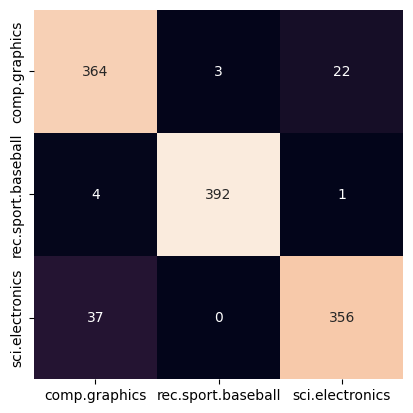

In [35]:
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=train.target_names, yticklabels=train.target_names)

In [36]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       389
           1       0.99      0.99      0.99       397
           2       0.94      0.91      0.92       393

    accuracy                           0.94      1179
   macro avg       0.94      0.94      0.94      1179
weighted avg       0.94      0.94      0.94      1179



In [38]:
# Nhận xét: có precision cao, recall cao

In [39]:
y_prod = model.predict_proba(X_test)
y_prod

array([[1.00000000e+00, 3.42558816e-40, 3.42505634e-11],
       [8.36429377e-15, 3.58304405e-17, 1.00000000e+00],
       [6.56547024e-19, 1.55118818e-25, 1.00000000e+00],
       ...,
       [1.29684570e-32, 3.82855312e-34, 1.00000000e+00],
       [3.72461935e-34, 1.72589031e-52, 1.00000000e+00],
       [2.44615747e-25, 7.21330233e-70, 1.00000000e+00]])

In [40]:
# Dựa trên tất cả các đánh giá  => Model phù hợp

In [41]:
# Ghi model

In [42]:
import pickle
# Save to file in the current working directory
pkl_filename = 'newgroup_model.pkl'
with open(pkl_filename,'wb') as file:
    pickle.dump(model, file)
# Luu model CounVectorizer (count) theo cach tren

In [43]:
# Đọc model
with open(pkl_filename,'rb') as file:
    ham_spam_model = pickle.load(file)
    

#### Theo bạn, model Naive Bayes có quan tâm tới trật tự các từ trong 1 mẫu câu hay không? Nếu có/ nếu không có, giải thích xem điều này có tác hại như thế nào, hay nói cách khác mô hình Naive Bayes có điểm yếu như thế nào từ nhận định này?

#### =>  model Naive Bayes Không quan tâm tới trật tự các từ.
#### => tác hại: gây hưởng nghiêm trọng đến phân tích ngữ nghĩa của câu khi thay đổi trật từ của câu.